<a href="https://colab.research.google.com/github/WittmannF/DL-plagiarism-detector/blob/master/Plagiarism_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# 1. TODO: Import any additional packages
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50

TARGET_SHAPE = (224, 224, 3)

# 2. TODO: Initialize base model
base_model = ResNet50(include_top=False, input_shape=TARGET_SHAPE)

# 3. TODO: Freeze layers from the base model
for layer in base_model.layers:
    layer.trainable=False
    
# 4. TODO: Add Fully connected layer to the base model
model = Sequential([base_model,
                    GlobalAveragePooling2D()])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
import numpy as np
import requests
from io import BytesIO
from PIL import Image

In [0]:
URLS = ['https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.101.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.102.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.104.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.105.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.106.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.107.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.108.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.109.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/cat.111.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg',
        'https://images.pexels.com/photos/20787/pexels-photo.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/9/9e/Tabby_cat-3337027.jpg',
        'https://images.pexels.com/photos/162349/dog-hybrid-animal-lying-162349.jpeg',
        'https://images.pexels.com/photos/356378/pexels-photo-356378.jpeg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.101.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.102.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.103.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.104.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.105.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.106.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.107.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.108.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.109.jpg',
        'https://raw.githubusercontent.com/WittmannF/ImageDataGenerator-example/master/flow_from_dataframe/train/dog.111.jpg']

target_shape=(224,224)

In [0]:
def read_img_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_shape)
    return img

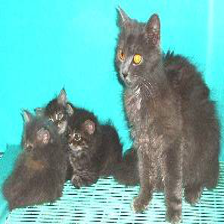

In [37]:
img = read_img_url(URLS[0]); img

In [0]:
from keras.applications.resnet50 import preprocess_input

def preprocess_img(img):
    # Convert to a Numpy array
    img_np = np.asarray(img)

    # Reshape by adding 1 in the beginning to be compatible as input of the model
    img_np = img_np[None] # https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis

    # Prepare the image for the model
    img_np = preprocess_input(img_np)
    
    return img_np

In [0]:
img_np = preprocess_img(img)

In [0]:
result = model.predict(img_np)

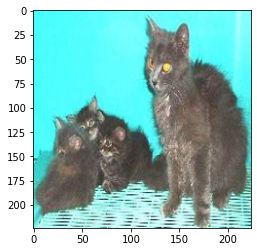

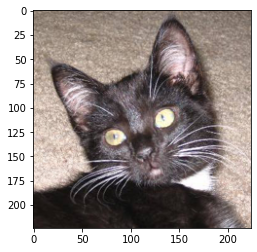

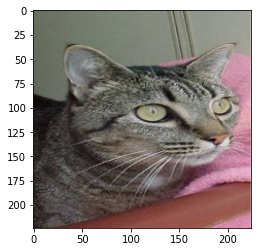

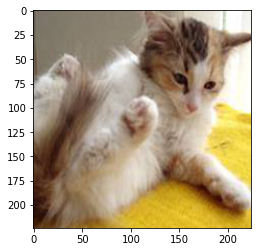

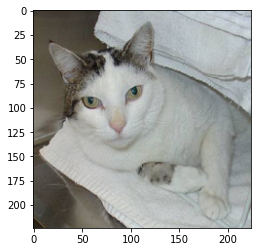

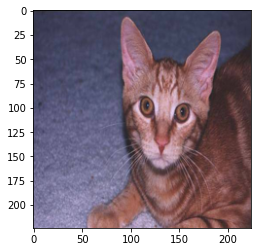

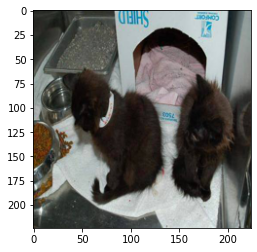

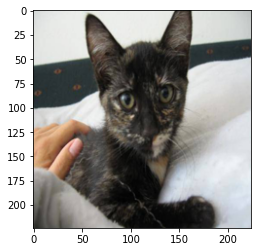

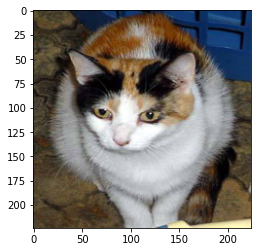

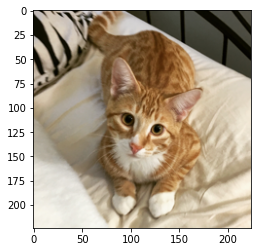

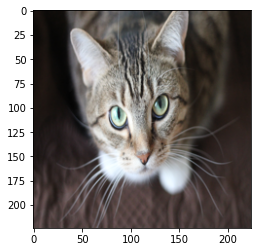

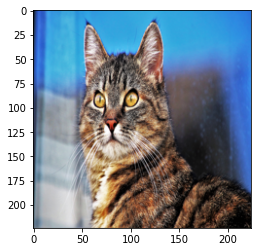

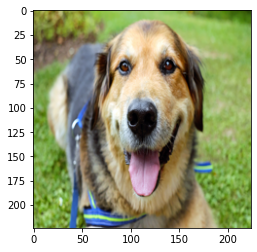

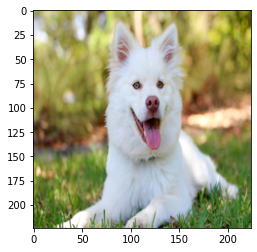

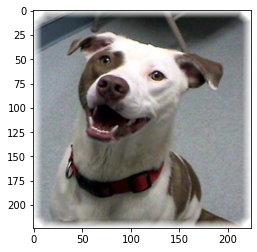

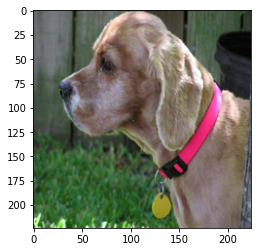

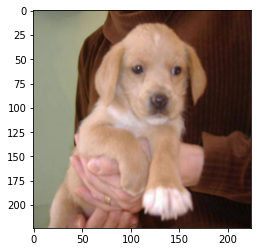

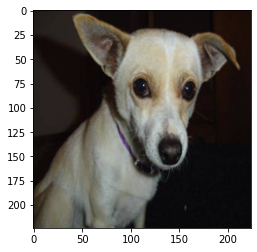

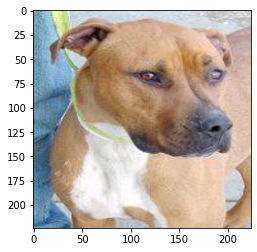

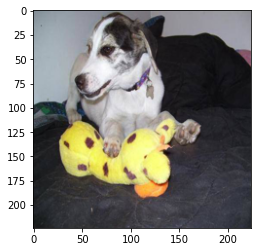

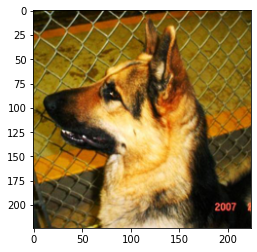

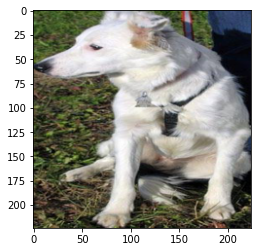

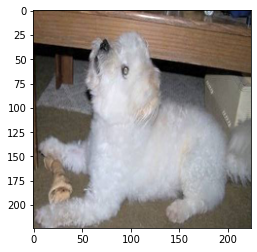

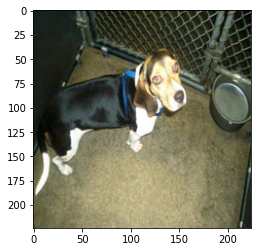

In [41]:
import matplotlib.pyplot as plt

all_features = []

for url in URLS:
    img = read_img_url(url)
    plt.imshow(img)
    plt.show()
    img_np = preprocess_img(img)
    result = model.predict(img_np)
    all_features.append(result[0])

In [42]:
import pandas as pd

df = pd.DataFrame(all_features); df

0         1         2     ...      2045      2046      2047
0   0.132829  0.413586  0.086961  ...  0.223447  0.629351  0.052894
1   0.000000  0.269902  0.000000  ...  0.000000  0.000000  0.005995
2   0.002411  0.181059  0.077072  ...  1.593698  0.039367  0.086086
3   0.019066  0.252144  0.517122  ...  1.446354  1.007250  0.000000
4   0.125163  0.069172  0.172974  ...  0.389094  0.036017  1.529462
5   0.311501  0.011614  0.088222  ...  0.032033  0.006265  0.004264
6   0.012622  1.177129  0.047809  ...  0.077989  0.870654  0.675521
7   0.182966  0.539720  0.062391  ...  0.210451  0.041797  0.013741
8   0.062707  0.022239  0.062993  ...  0.000207  0.033929  0.025917
9   0.042308  0.168865  0.034707  ...  0.133250  0.027247  0.199385
10  0.025938  0.364023  0.002671  ...  0.000000  0.022262  0.158811
11  0.315768  0.049677  0.072736  ...  0.000000  0.140156  0.000000
12  0.439888  0.076697  0.012772  ...  0.113848  0.268616  0.283168
13  0.537157  0.219324  0.081363  ...  0.023760  0.515167  0.064750
14  0.074983  0.022190  0.032406  ...  0.003298  0.152403  0.912184
15  0.009657  0.075343  0.006831  ...  0.398616  1.012173  1.997761
16  0.112222  0.087375  0.197820  ...  1.323354  0.124569  0.441363
17  0.863418  0.201244  0.000000  ...  0.249272  0.492226  0.787288
18  0.225977  0.182017  0.148276  ...  0.595111  0.014767  1.038784
19  0.056653  0.155258  0.099149  ...  0.773147  0.868952  0.061442
20  0.706495  0.031198  0.028877  ...  0.805889  0.065613  0.066100
21  0.125832  0.046838  0.098298  ...  0.003466  0.343127  0.361210
22  0.445754  0.168261  0.137085  ...  0.256496  0.000000  0.040558
23  0.065909  0.083658  0.162983  ...  1.945218  1.341696  0.203494

[24 rows x 2048 columns]

## PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
reduced_data = pca.transform(df)

In [0]:
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [46]:
reduced_data

Dimension 1  Dimension 2
0      8.654952    20.177357
1     15.826361    -3.625912
2     13.435876    -5.699792
3      5.418866     1.250480
4      9.235741    -4.418438
5      8.738600    -5.075117
6      0.537189    29.296102
7     13.007319     0.099586
8      5.086099    -1.119834
9      8.705969    -4.819144
10    14.779037    -7.528453
11    12.934602    -0.075158
12   -10.789495    -1.485408
13    -7.249465    -1.046292
14    -6.798470    -3.780941
15   -12.353508    -0.862708
16    -9.700213    -5.145161
17    -7.826119    -6.090847
18   -11.830539    -7.048591
19   -10.324814    -0.624910
20   -10.764450     1.348152
21    -9.937039    -1.658344
22    -5.481914     4.698991
23   -13.304586     3.234382

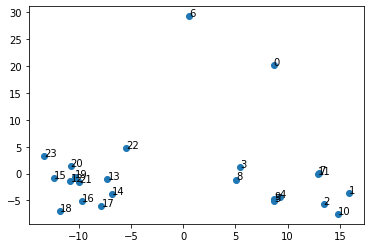

In [47]:
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'])

for item in reduced_data.itertuples():
    plt.annotate(item[0], (item[1], item[2]))
    

In [0]:
y    = [ 0,
         0,
         0,
         0,
         0,
         0,
         0,
         0,
         0,
         0,
         0,
         0,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1]

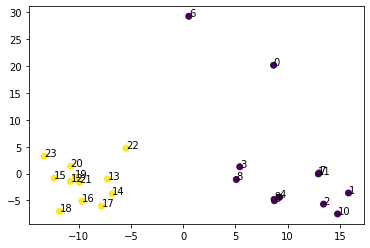

In [50]:
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=y)
for item in reduced_data.itertuples():
    plt.annotate(item[0], (item[1], item[2]))

Something seems odd about cat number 6, let's take a look:

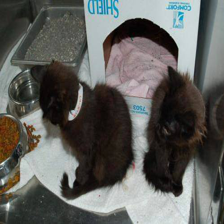

In [52]:
read_img_url(URLS[6])

Is it the fact it has two cats intead of one? Let's check the others

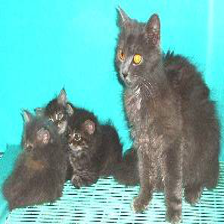

In [53]:
read_img_url(URLS[0])

Maybe that's correct since index 0 also is an outlier. 

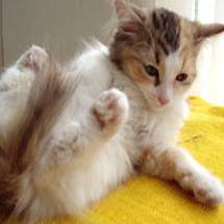

In [54]:
read_img_url(URLS[3])

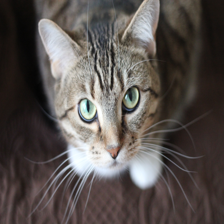

In [55]:
read_img_url(URLS[10])

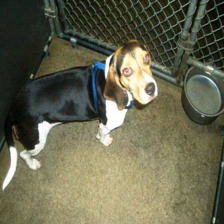

In [59]:
read_img_url(URLS[23])

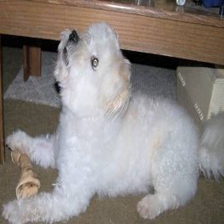

In [57]:
read_img_url(URLS[22])

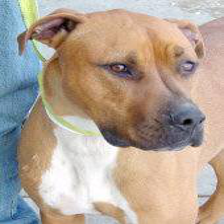

In [58]:
read_img_url(URLS[18])

### Conclusion
The X Axis turned to be what differentiates dogs and cats.  The Y is unclear, just the outliers show that they happen when there are more than 1. 
  

## More Cats and Dogs
Based on https://github.com/WittmannF/course/blob/master/day-4/assignment-3-cats-dogs-solved.ipynb

In [84]:
import os

DATA_PATH = 'cats-dogs-data/'
DATA_URL = 'https://github.com/dl7days/datasets/raw/master/cats-dogs-data.zip'
ZIP_FILENAME = 'cats-dogs-data.zip'

if not os.path.exists(DATA_PATH):# If dataset folder doesn't exist
    try: # Then try downloading and unzipping it
        print("Downloading Dataset...")
        os.system(f"wget {DATA_URL}")

        print("Unzipping Dataset")
        os.system(f"unzip {ZIP_FILENAME}")

        print("Removing .zip file")
        os.system(f"rm {ZIP_FILENAME}")
    except Exception as e: # If there's an error, ask to download manually
        print(f"Something went wrong. Please download the dataset manually at {DATA_URL}")
        print(f'The following exception was thrown:\n{e}')
else:
    print(f'Dataset folder {DATA_PATH} has been found')

Dataset folder cats-dogs-data/ has been found


In [0]:
# Assign training and validation folders
TRAIN_PATH = f'{DATA_PATH}train/'
VALID_PATH = f'{DATA_PATH}valid/'

In [0]:
import glob

filepaths = glob.glob(TRAIN_PATH+'/cat/*.jpg')
for f in glob.glob(TRAIN_PATH+'/dog/*.jpg'):
    filepaths.append(f)

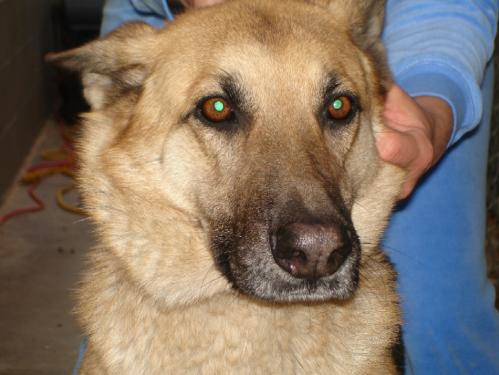

In [87]:
from keras.preprocessing.image import load_img
import random

load_img(random.choice(filepaths))

In [64]:
# TODO: Import the model and the preprocess_input function
from keras.applications.resnet50 import ResNet50, preprocess_input

# TODO: Import the ImageDataGenerator class
from keras.preprocessing.image import ImageDataGenerator

# Shape in which all images are going to be reshaped
TARGET_SHAPE = (224, 224, 3)

# TODO: Initialize the data generator class 
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# TODO: Create the training and validation generators using the method flow_from_directory
train_gen = datagen.flow_from_directory(TRAIN_PATH, 
                                        target_size=TARGET_SHAPE[:2], 
                                        class_mode='sparse',shuffle=False)
valid_gen = datagen.flow_from_directory(VALID_PATH, 
                                        target_size=TARGET_SHAPE[:2], 
                                        class_mode='sparse',
                                        shuffle=False)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [65]:
# 1. TODO: Import any additional packages
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50

TARGET_SHAPE = (224, 224, 3)

# 2. TODO: Initialize base model
base_model = ResNet50(include_top=False, input_shape=TARGET_SHAPE)

# 3. TODO: Freeze layers from the base model
for layer in base_model.layers:
    layer.trainable=False
    
# 4. TODO: Add Fully connected layer to the base model
model = Sequential([base_model,
                    GlobalAveragePooling2D()])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [66]:
all_predictions = model.predict_generator(valid_gen, verbose=1)

13/13 [==============================] - 79s 6s/step


In [0]:
import pandas as pd
df = pd.DataFrame(all_predictions)

In [0]:
y = valid_gen.classes

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

reduced_data.head()

Dimension 1  Dimension 2
0     4.252814     2.092204
1    12.299230    -1.785163
2     2.605002    -0.172858
3    12.260324    -0.228693
4    10.133899    -1.744703

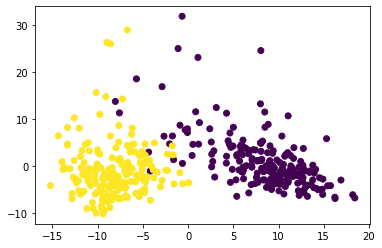

In [100]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(40, 40))
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=y)
#for item in reduced_data.itertuples():
#    if item[0]%1==0:
#        plt.annotate(item[0], (item[1], item[2]))

### T-SNE


In [71]:
from sklearn.manifold import TSNE
reduced_data = TSNE(n_components=2).fit_transform(df)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

reduced_data.head()

Dimension 1  Dimension 2
0    21.150682     9.968470
1    11.485982     4.865916
2     2.245560     0.867740
3     1.945132    17.033440
4    10.795341     8.669805

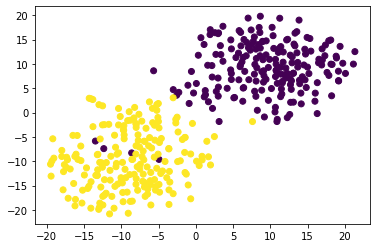

In [72]:
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=y)

### Conclusion
It seems many features are extracted which does not really make predominant the feature which distinguishes cats vs dogs. So, it might not be enough to use a feature extractor

### GaussianMixture

In [73]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
range_components = [2,3,4,5,6,7,8,9,10]

for n_components in range_components:
# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components, covariance_type='full')
    clusterer.fit(df)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(df)

# TODO: Find the cluster centers
    centers = clusterer.means_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = score = silhouette_score(df, preds)
    print ("Silhouette coefficient for {} clusters: {:.3f}".format(n_components, score))

Silhouette coefficient for 2 clusters: 0.094
Silhouette coefficient for 3 clusters: 0.096
Silhouette coefficient for 4 clusters: 0.068
Silhouette coefficient for 5 clusters: 0.084
Silhouette coefficient for 6 clusters: 0.044
Silhouette coefficient for 7 clusters: 0.045
Silhouette coefficient for 8 clusters: 0.064
Silhouette coefficient for 9 clusters: 0.034
Silhouette coefficient for 10 clusters: 0.019


In [74]:
n_components=2

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components, covariance_type='full')
clusterer.fit(df)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(df)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(df, preds)
print ("Silhouette coefficient for {} clusters: {:.3f}".format(n_components, score))

Silhouette coefficient for 2 clusters: 0.097


In [75]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [77]:
np.mean(preds==y)

0.03

### RandomForestClassifier 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(random_state=0)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=0)

In [81]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [82]:
clf.score(X_test, y_test)

0.97